# COGS 118B - Final Project

# Chess AI

## Group members

- Jiayi Dong
- William Zhao
- Qianxia Hui

# Abstract 
The development of chess artificial intelligence (AI) has been significantly propelled by deep learning technologies. Traditionally, systems like AlphaZero have dominated this area but come with high financial costs due to their training methodologies, which use self-play reinforcement learning. This research seeks to construct a chess AI using supervised machine learning with data extracted from existing chess engines, specifically Stockfish, to avoid the high training costs. By leveraging over 5.5 million evaluated positions from Lichess database games, this approach aims to train a neural network to understand and predict optimal chess moves effectively. The performance of the developed AI will be measured against established metrics such as the accuracy of predicted evaluations and game outcomes against standard engines.

# Background

Chess has long been a test bed for advancements in artificial intelligence, with earlier efforts focusing on brute-force algorithms and more recent efforts on sophisticated machine learning techniques. The introduction of AlphaZero marked a significant change due to its use of deep reinforcement learning, achieving superhuman performance by learning from self-play without human intervention [1]. However, the cost and computational demands of such technologies limit their accessibility. Recent developments have seen a rise in using supervised learning approaches, utilizing historical data from games where positions were evaluated by advanced engines like Stockfish. These methods offer a more economical and scalable alternative for training chess AIs [2].

The success of AlphaZero has inspired researchers to explore alternative approaches that can achieve similar performance levels while being more computationally efficient and accessible. One such approach is the use of supervised learning on large datasets of annotated games, where the positions are labeled with evaluations from powerful chess engines [3]. This method leverages the existing knowledge encoded in these engines, which have been meticulously refined over decades of development by chess programmers and grandmasters.

While supervised learning methods may not achieve the same level of superhuman performance as AlphaZero, they offer several advantages. They can be trained on commodity hardware, making them more accessible to researchers and hobbyists alike. Additionally, the training process is more transparent and interpretable, as the model learns from explicitly labeled data rather than through the opaque process of reinforcement learning [4]. This transparency can aid in understanding the decision-making process of the AI and potentially lead to insights that can be transferred back to human players.

As the field of chess AI continues to evolve, the interplay between different approaches, such as reinforcement learning and supervised learning, will likely yield new insights and advancements. The availability of large datasets and powerful hardware resources has opened up new avenues for exploration, promising to push the boundaries of what is possible in the realm of chess and artificial intelligence.

# Problem Statement

The core problem addressed in this research is the high cost and computational inefficiency associated with training competitive chess AIs through self-play and reinforcement learning. This problem is measurable through the financial and computational metrics involved in the training process, quantifiable by comparing the costs and resources required for training different models, and replicable as it affects anyone attempting to develop a competitive chess AI. Our proposed solution involves training a supervised machine learning model on a dataset of pre-evaluated chess positions by Stockfish, available through the Lichess platform. This method is expected to significantly reduce cost and computational demands while maintaining a competitive level of play.

# Data
### 1. Chess Game Dataset (Lichess)
[Chess Game Dataset (Lichess)](https://www.kaggle.com/datasets/datasnaek/chess) is a chess game dataset on kaggle. The original data was downloaded from lichess.org. This dataset was a portion of dataset collected from 6 million games played during July of 2016. Each game data consists of game type, player information, game time, opening name, game results and the whole game move. Two of the most important variables are the game results and game moves, which is stored in Movetext format, enabling us to access the game step by step. The detailed game information would help us train and test the model. However, there is no evaluation for each move. Therefore, we will need to think about ways to evaluate these moves and train the model. Furthermore, since game moves are stored in a particular format, we will need to transform it to usable format for training purpose. 

### 2. Lichess.org open database.
We used a month of chess match data in july of 2021 (https://storage.googleapis.com/chesspic/datasets/2021-07-31-lichess-evaluations-37MM.db.gz). This database provided a dataset with about 5.5+ million games from July 2021 with evaluations to each moves. This includes about 441,600,000 non-unique positions. The data is stored in pgn format and needs to be transformed into usable format. Since its a large dataset, it is stored in SQLite database. We may need to reduce the dataset size for a reasonable training time.
 
### 3. Python Chess Library
[Python Chess](https://python-chess.readthedocs.io/en/latest/index.html) is a python library that allow users to create random board in different game depth (eg. a random board in its 24 turns) in pgn format. This will allow us to create as many data as we want. However, the created board is not in a real game, the validity of the training result is questionable. We also need to access stockfish api for evaluations of the created board.


# Proposed Solution
Data will be processed first. We will need to extract every move and its corresponding evaluations for each game and use them as the training and testing data. We also need to control the size of the data in order to train the model in a reasonable time.

For our project, we will be using python and pytorch to train several models, such as MinMax, Random Forest and CNN and compare the training results.

We will be using two ways to evaluate the final model. One way is to check the accuracy of the move models picked for a known game. The other way is by using other engine to play with our model and check its winning rate. The later method may require more effort since we need to create an interactive environment for two AI models.

It would be unlikely we could reach the state-of-the-art-model level as our training recourses are limited and are using relatively simple algorithms and models. But we can still compare to some of the models we can found online such as AlphaZero and MAIA Chess.

# Evaluation Metrics

### 1. Mean Absolute Error (MAE)

MAE measures how closely the AI's evaluations of chess positions align with those given by a high-quality benchmark engine (like Stockfish). This metric assesses the accuracy of the model in predicting evaluation scores, which is critical for developing a competitive chess AI.

**Mathematical Representation:**  
The Mean Absolute Error is calculated as follows:

$$\text{MAE} = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|$$

where:
- \(N\) is the total number of evaluated positions in the test set.
- \(y_i\) is the actual evaluation score provided by the benchmark model for position \(i\).
- \(\hat{y}_i\) is the predicted evaluation score by your model for position \(i\).

**Advantages:**  
- Provides a clear, numeric measure of prediction accuracy.
- Linear scoring means all errors are weighted equally.
- Effective for ensuring predictions are as close as possible to actual values, critical in strategy games like chess.

### 2. Win Rate Against Various Opponents

The Win Rate evaluates the AI's effectiveness in actual gameplay by measuring the percentage of games it wins against a variety of opponents. This metric directly reflects the AI’s practical performance and strategic success.

**Mathematical Representation:**  
The Win Rate is defined as:

$$\text{Win Rate} = \left(\frac{\text{Number of games won by the AI}}{\text{Total number of games played}}\right) \times 100\%$$

where:
- "Games won by the AI" includes all matches won against various opponents.
- "Total number of games played" counts every game played by the AI during the testing phase.

**Advantages:**  
- Direct relevance to chess, as winning games is the ultimate measure of success.
- Intuitive and straightforward, making it an easily understandable metric for performance.
- Useful for benchmarking performance across different types of opponents and competitive scenarios.

# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset one (game.csv)
The dataset explored in this part of EDA is a dataset without evaluation of each move made by the player.

In [2]:
dataset = pd.read_csv('datasets/games.csv')
dataset.shape

(20058, 16)

In [3]:
dataset.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [4]:
dataset.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


#### Check the distribution of player's rating

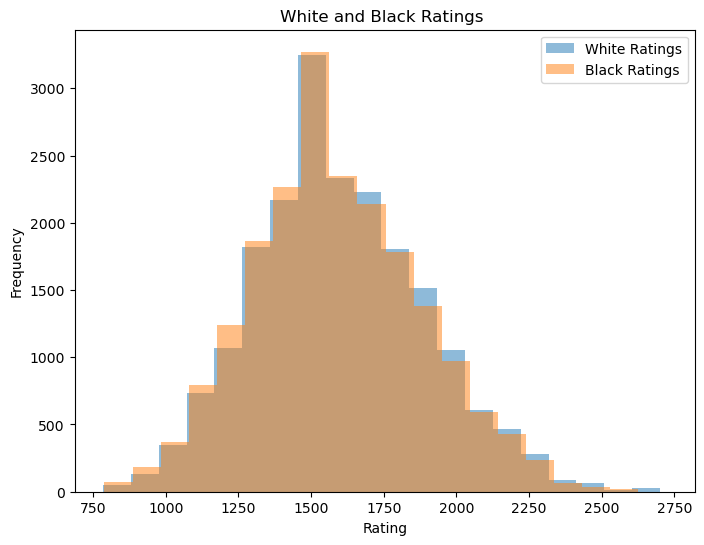

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(dataset['white_rating'], bins=20, alpha=0.5, label='White Ratings')
plt.hist(dataset['black_rating'], bins=20, alpha=0.5, label='Black Ratings')
plt.legend()
plt.title('White and Black Ratings ')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The matches recorded in the dataset are pretty fair as player's ratings has similar distributions. 

#### Victory Status

In [6]:
victory = dataset['victory_status'].value_counts()
victory

victory_status
resign       11147
mate          6325
outoftime     1680
draw           906
Name: count, dtype: int64

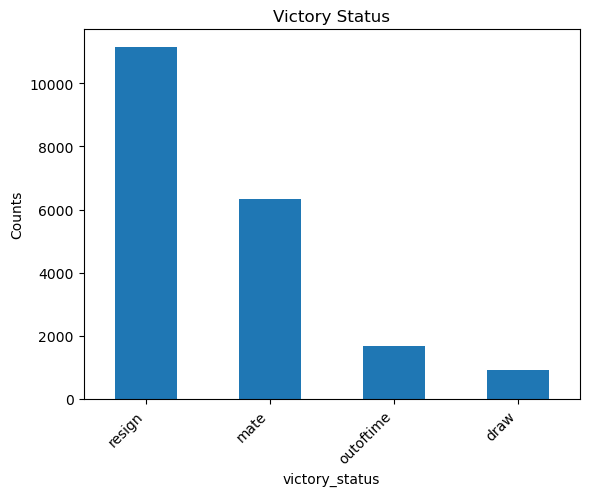

In [7]:
victory.plot(kind='bar')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right', va='top')
plt.title('Victory Status');

Most of the games end with resign and mate, while some are out of time or draw.

#### Distribution of Opening names 

In [8]:
name_counts = dataset['opening_name'].value_counts().sort_values(ascending=False)
name_counts

opening_name
Van't Kruijs Opening                                                 368
Sicilian Defense                                                     358
Sicilian Defense: Bowdler Attack                                     296
Scotch Game                                                          271
French Defense: Knight Variation                                     271
                                                                    ... 
Amazon Attack: Siberian Attack                                         1
Italian Game: Scotch Gambit                                            1
Semi-Slav Defense: Marshall Gambit |  Main Line                        1
Queen's Indian Defense: Classical Variation |  Polugaevsky Gambit      1
Sicilian Defense: Najdorf Variation |  Polugaevsky Variation           1
Name: count, Length: 1477, dtype: int64

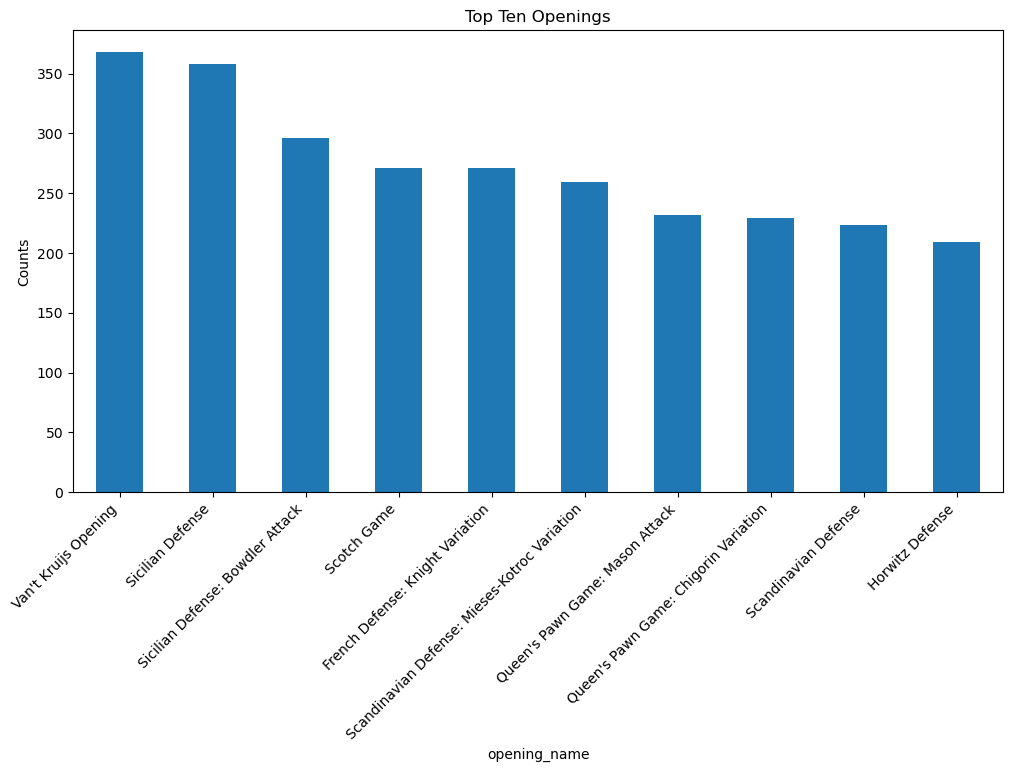

In [9]:
name_counts[:10].plot(kind='bar', figsize=(12, 6))
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right', va='top')
plt.title('Top Ten Openings');

#### Turns

In [10]:
turns = dataset['turns'].value_counts()
turns

turns
53     303
45     302
51     299
57     297
39     297
      ... 
216      1
208      1
176      1
218      1
201      1
Name: count, Length: 211, dtype: int64

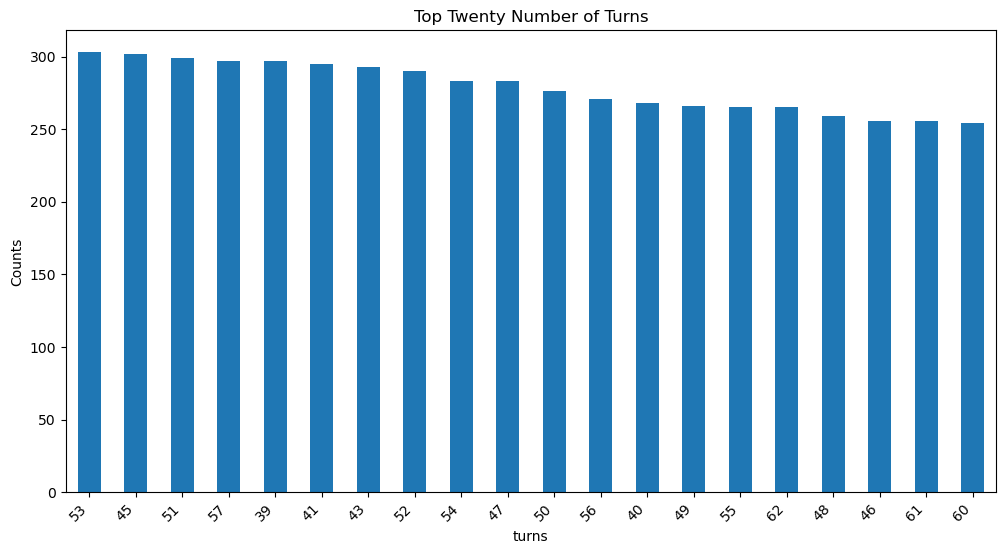

In [11]:
turns[:20].plot(kind='bar', figsize=(12, 6))
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right', va='top')
plt.title('Top Twenty Number of Turns');

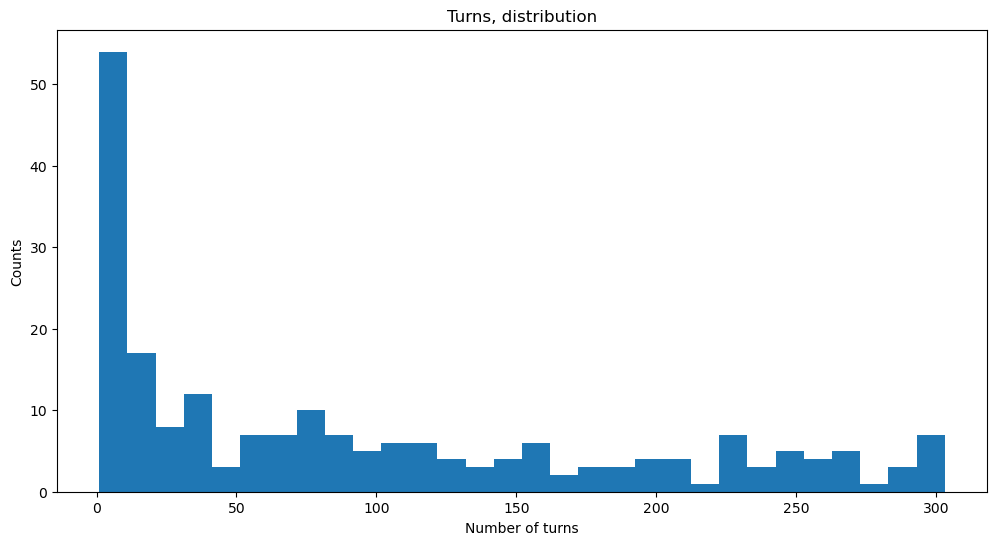

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(turns, bins=30)
plt.ylabel('Counts')
plt.xlabel('Number of turns')
plt.title('Turns, distribution')
plt.show()

It is a right skewed distribution. Most of the games ends under 50 turns. 

In [13]:
# Extract all the moves from the dataset. 
moves = dataset['moves']

In [14]:
print(dataset.iloc[5])
print(moves[5])

id                                            MsoDV9wj
rated                                            False
created_at                             1504240000000.0
last_move_at                           1504240000000.0
turns                                                5
victory_status                                    draw
winner                                            draw
increment_code                                    10+0
white_id                                     trelynn17
white_rating                                      1250
black_id                                 franklin14532
black_rating                                      1002
moves                                 e4 c5 Nf3 Qa5 a3
opening_eco                                        B27
opening_name      Sicilian Defense: Mongoose Variation
opening_ply                                          4
Name: 5, dtype: object
e4 c5 Nf3 Qa5 a3


In [15]:
# One move in the game
moves[100]

'e4 e6 d4 d5 Nc3 c5 exd5 exd5 Nf3 Nc6 Bb5 Nf6 O-O Be7 dxc5 O-O Bg5 h6 Bxf6 Bxf6 Nxd5 Bxb2 Rb1 Ba3 Re1 Bxc5 Bd3 Be6 c4 b6 Be4 Rc8 Qa4 Ne7 Rbd1 Nxd5 cxd5 Bd7 Qb3 Qf6 Bb1 Bd6 Qd3 g6 h3 Qf4 Re4 Qf6 Qe3 Rfe8 Qxh6 Rxe4 Bxe4 Bf4 Qh4 Qxh4 Nxh4 Bd6 g4 a5 Nf3 b5 Nd4 Rc4 Bg2 Bc5 Nc6 Bxc6 dxc6 Be7 Bd5 Rc5 Kg2 Kg7 Rd3 Kf6 f4 g5 Kf3 Kg6 Ke4 f6 fxg5 fxg5 Rf3 Bf6 Rf5 Rc2 Rf3 Re2+ Re3 Rc2 Kf3 b4 Be4+ Kg7 Bxc2 a4 Bxa4 Kg6 c7'

Number of moves and number of turns are correlated. It is pretty intuitive to see the more turns the game has, the more move the play will make.

### Dataset two (SQLite database)

Due to the size of this dataset, it is stored in a database.

The original data was in PGN (Portable Game Notation) format, which looks like this:

This is the data of a single game. 

After all the game information, each move is listed with its corresponding stockfish evaluation.

<img src="Images/PNGfile.png" width="600"/>

Each move in a game was then formated in the following format so it is much clearer and usable. It includes move id, FEN (text encoding of the position), binary representation of the board for direct use by the model and the evaluation.

<img src="Images/formated.png" width="600"/>

# Results

### Model trained with Board Evaluation

- Since the database is too large, all the training were done on Google Colab, the following are code reference and corresponding output images from the training done on Colab.

In [16]:
# Uncomment to install the packages and download the dataset with evaluations.

# pip install peewee pytorch-lightning chess
# wget https://storage.googleapis.com/chesspic/datasets/2021-07-31-lichess-evaluations-37MM.db.gz
# gzip -d "2021-07-31-lichess-evaluations-37MM.db.gz"
# rm "2021-07-31-lichess-evaluations-37MM.db.gz"

### Connect to the database

In [17]:
from peewee import *
import base64

# Initiate database class
db = SqliteDatabase('2021-07-31-lichess-evaluations-37MM.db')

class Evaluations(Model):
  id = IntegerField()
  fen = TextField()
  binary = BlobField()
  eval = FloatField()

  class Meta:
    database = db

  def binary_base64(self):
    return base64.b64encode(self.binary)
  
db.connect()

# LABEL_COUNT limites the number of data that will be used to train the model
LABEL_COUNT = 20058
print(LABEL_COUNT)
eval = Evaluations.get(Evaluations.id == 1)
print(eval.binary_base64())

20058
b'CAAAAAAAAAAQAAAAAAAAAIEAAAAAAAAAJAAAAAAAAABCAAAAAAAAAADvABAAAAAAAAAAAAAAAAgAAAAAAAAAEAAAAAAAAACBAAAAAAAAACQAAAAAAAAAQgAAAAAAAP8AAAABEz8='


### Create a dataset class to change a stream of individual data from database to a actual dataset that can be used by pytorch-lightning.

EvaluationDataset takes single random row from the  database and process it by extracting the binary value in raw bytes, converting bytes into floats using numpy’s frombuffer and unpackbits functions, and forming a 808 length float array as input.

In [18]:
import os
import torch
import numpy as np
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, IterableDataset, random_split
import pytorch_lightning as pl
from random import randrange

class EvaluationDataset(IterableDataset):
  def __init__(self, count):
    self.count = count

  def __iter__(self):
    return self
  
  def __next__(self):
    idx = randrange(self.count)
    return self[idx]
  
  def __len__(self):
    return self.count
  
  # Differet feature of a single data point
  def __getitem__(self, idx):
    # Evaluation, which is the target
    eval = Evaluations.get(Evaluations.id == idx+1)

    # binary buffer
    bin = np.frombuffer(eval.binary, dtype=np.uint8)
    bin = np.unpackbits(bin, axis=0).astype(np.single)

    # Limite the max and min value of the evaluation to avoid extreme values and help model converge
    eval.eval = max(eval.eval, -15)
    eval.eval = min(eval.eval, 15)
    ev = np.array([eval.eval]).astype(np.single)
    
    return {'binary':bin, 'eval':ev}

# Initialize the dataset
dataset = EvaluationDataset(count=LABEL_COUNT)

### Experiment tracking
Use tensorboard to track the training results.
(note this step might trigger some bugs depends on the arcbetecture running from, if errors occur, skip this step).

# Start tensorboard.
%reload_ext tensorboard
%tensorboard --logdir lightning_logs/

### Training process

**Class**

EvaluationModel is a class for model training. 

**Model**

The model is a MLP. We experimented on different model architectures. We tested on different depth of layers, four, six and eight linear layers, all followed with a Relu layer except the last layer. The input has 808 dimenstions. Besides the last layer, all layer take 808 dimension input and 808 dimension output. The last layer's output is a single float, which is the prediction of the evaluation. 

**Hyperparameter**

We use L1 loss for the loss function and Adam for optimizer. For each model, we will train for a ten epochs.

The hyperparameters we tuned were batch_size and learning_rate. We tried 128 & 256 for batch_size, and 1e-3 $ 3e-5 for learning_rate. 

**There is a total of 9 models trained in this part.**

In [24]:
import time
from collections import OrderedDict

class EvaluationModel(pl.LightningModule):
  def __init__(self,learning_rate=1e-3,batch_size=1024,layer_count=10):
    super().__init__()
    self.batch_size = batch_size
    self.learning_rate = learning_rate
    layers = []

    # Initialize the layers
    for i in range(layer_count-1):
      layers.append((f"linear-{i}", nn.Linear(808, 808)))
      layers.append((f"relu-{i}", nn.ReLU()))
    layers.append((f"linear-{layer_count-1}", nn.Linear(808, 1)))
    self.seq = nn.Sequential(OrderedDict(layers))

  def forward(self, x):
    return self.seq(x)
  
  # Each training step trains a batch
  def training_step(self, batch, batch_idx):
    x, y = batch['binary'], batch['eval']
    y_hat = self(x)
    loss = F.l1_loss(y_hat, y)
    self.log("train_loss", loss)
    return loss

  def configure_optimizers(self):
    return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

  def train_dataloader(self):
    dataset = EvaluationDataset(count=LABEL_COUNT)
    return DataLoader(dataset, batch_size=self.batch_size, num_workers=0, pin_memory=True)

# Hyperparameter tuning
configs = [
           {"layer_count": 4, "batch_size": 2048, "learning_rate":1e-3},
           #add more hyperparameters if want to try different configurations.
           ]


# Train different model based on the configuration
for config in configs:
  version_name = f'{int(time.time())}-batch_size-{config["batch_size"]}-layer_count-{config["layer_count"]}-learning_rate-{config["learning_rate"]}'
  logger = pl.loggers.TensorBoardLogger("lightning_logs", name="chessAI", version=version_name)
  trainer = pl.Trainer(accelerator='mps',precision=16,max_epochs=5,logger=logger)
  model = EvaluationModel(layer_count=config["layer_count"],batch_size=config["batch_size"],learning_rate=config["learning_rate"])
  trainer.fit(model)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type       | Params
------------------------------------
0 | seq  | Sequential | 2.0 M 
------------------------------------
2.0 M     Trainable params
0         Non-trainable params
2.0 M     Total params
7.847     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


<img src="Images/train.png" width="800"/>

The loss was recorded per step, which meanings with the same dataset, the larger the batch size, the less step it takes to finish training.

From the graph, we can discover several trends. With the same learning rate and batch size, the deeper the neuron network, the lower loss model can achieve. However, this effect decreases with a larger learning rate. With the same learning rate, the larger the batch size, the quicker the model converges.  For this task, a learning rate of 1e-3 is sufficient enough to achieve a relatively low loss. There is no need to train with a lower learning rate. 

The best model according to the loss is the model with a **batch size of 256, 8 linear layer and a learning rate of 1e-3**. It is a relatively complicated model but can still be trained quickly.


### Board Visualization

The best model with the configuration mentioned above is used to show the prediction with the corresponding board visualization.

Idx 7992 Eval 7.15 Prediction 4.33 Loss 2.82
FEN 1r2r1k1/qp1bppb1/n4npp/2pPP3/p1P4B/P1NB1N1P/1P1Q2P1/2R2RK1 b - - 0 18


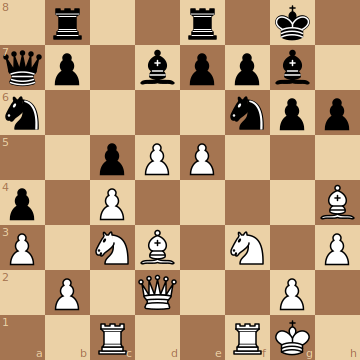

Idx 1729 Eval -0.52 Prediction -0.71 Loss 0.19
FEN r2q1rk1/p4p1p/4b1n1/2pp1p2/8/P4B1P/1PP2PPN/R2Q1RK1 b - - 1 17


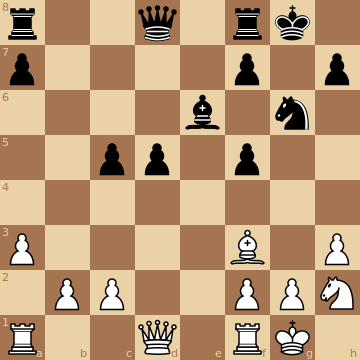

In [25]:
# The code that helps to visualize the board.
from IPython.display import display, SVG
from random import randrange

SVG_BASE_URL = "https://us-central1-spearsx.cloudfunctions.net/chesspic-fen-image/"

# Put board and pieces together
def svg_url(fen):
  fen_board = fen.split()[0]
  return SVG_BASE_URL + fen_board

# Visualization the board and print the model prediction, actual evaluaion and loss.
def show_index(idx):
  eval = Evaluations.select().where(Evaluations.id == idx+1).get()
  batch = dataset[idx]
  x, y = torch.tensor(batch['binary']), torch.tensor(batch['eval'])
  y_hat = model(x)
  loss = F.l1_loss(y_hat, y)
  print(f'Idx {idx} Eval {y.data[0]:.2f} Prediction {y_hat.data[0]:.2f} Loss {loss:.2f}')
  print(f'FEN {eval.fen}')
  display(SVG(url=svg_url(eval.fen)))

# Show 2 random board with evaluation predictions
for i in range(2):
  idx = randrange(LABEL_COUNT)
  show_index(idx)

<img src="Images/board.png" width="600"/>

Here are two random board with its corresponding true evaluation and prediction.

### Evaluations

Compare the model prediction loss with two different loss. All loss are calculated based on L1 loss function

**guess_zero_loss** shows the L1 loss if all the evaluation predicted are zero.

**guess_material_loss** assigned each piece with a value, white is positive and black is negative. The total evaluation is the sum of all the pieces on the board. 

**guess_model_loss** shows the actual L1 loss of the model 

The best model's loss is used here to compare with the other two benchmark loss.

In [26]:
import chess

# Value assigned to each piece
MATERIAL_LOOKUP = {chess.KING:0,chess.QUEEN:9,chess.ROOK:5,chess.BISHOP:3,chess.KNIGHT:3,chess.PAWN:1}

def avg(lst):
    return sum(lst) / len(lst)

# Calculate the board value
def material_for_board(board):
  eval = 0.0
  for sq, piece in board.piece_map().items():
    mat = MATERIAL_LOOKUP[piece.piece_type]
    if piece.color == chess.BLACK:
      mat = mat * -1
    eval += mat
  return eval

def guess_zero_loss(idx):
  eval = Evaluations.select().where(Evaluations.id == idx+1).get()
  y = torch.tensor(eval.eval)
  y_hat = torch.zeros_like(y)
  loss = F.l1_loss(y_hat, y)
  return loss

def guess_material_loss(idx):
  eval = Evaluations.select().where(Evaluations.id == idx+1).get()
  board = chess.Board(eval.fen)
  y = torch.tensor(eval.eval)
  y_hat = torch.tensor(material_for_board(board))
  loss = F.l1_loss(y_hat, y)
  return loss

def guess_model_loss(idx):
  eval = Evaluations.select().where(Evaluations.id == idx+1).get()
  batch = dataset[idx]
  x, y = torch.tensor(batch['binary']), torch.tensor(batch['eval'])
  y_hat = model(x)
  loss = F.l1_loss(y_hat, y)
  return loss

zero_losses = []
mat_losses = []
model_losses = []
for i in range(100):
  idx = randrange(LABEL_COUNT)
  zero_losses.append(guess_zero_loss(idx))
  mat_losses.append(guess_material_loss(idx))
  model_losses.append(guess_model_loss(idx))
print(f'Guess Zero Avg Loss {avg(zero_losses)}')
print(f'Guess Material Avg Loss {avg(mat_losses)}')
print(f'Guess Model Avg Loss {avg(model_losses)}')

Guess Zero Avg Loss 7.691699981689453
Guess Material Avg Loss 5.401899814605713
Guess Model Avg Loss 1.8498691320419312


<img src="Images/loss.png" width="400"/>

Above is the result of the model loss and two benchmark loss.

### Model trained with outcome model

#### define gamesdataset and functions to decode moves and board position

In [27]:
import os
import time
import numpy as np
import torch
import chess
import chess.pgn
import pandas as pd
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split
import pytorch_lightning as pl
from collections import OrderedDict
from IPython.display import display, SVG
from random import randrange

# Define the GamesDataset class
class GamesDataset(Dataset):
    def __init__(self, csv_file):
        self.games_df = pd.read_csv(csv_file)
        # Filter out draws
        self.games_df = self.games_df[self.games_df['winner'] != 'draw']
        self.games_df = self.games_df.reset_index(drop=True)
        self.games_df['outcome'] = self.games_df['winner'].map({'white': 1, 'black': 0})  # Map results to integers

    def __len__(self):
        return len(self.games_df)

    def __getitem__(self, idx):
        row = self.games_df.iloc[idx]
        moves = row['moves']
        outcome = row['outcome']
        try:
            fen = self.moves_to_fen(moves)
        except Exception as e:
            print(f"Error converting moves to FEN: {e}")
            return self.__getitem__((idx + 1) % len(self.games_df))  # Retry with the next item
        board = chess.Board(fen)
        binary_board = self.board_to_binary(board)
        return {'binary': binary_board, 'outcome': torch.tensor(outcome, dtype=torch.long), 'fen': fen}

    def moves_to_fen(self, moves):
        game = chess.pgn.Game()
        node = game
        board = chess.Board()
        for move in moves.split():
            try:
                move_obj = board.parse_san(move)
                board.push(move_obj)
                node = node.add_main_variation(move_obj)
            except ValueError as e:
                raise Exception(f"Invalid move: {move}, Error: {e}")
        return board.fen()

    def board_to_binary(self, board):
        # Convert board to a binary format suitable for NN input
        binary = []
        for square in chess.SQUARES:
            piece = board.piece_at(square)
            if piece:
                binary.extend(self.piece_to_binary(piece))
            else:
                binary.extend([0] * 12)  # 12 channels for empty squares
        if len(binary) != 768:
            print(f"Error: Binary board representation has incorrect length {len(binary)}")
        return torch.tensor(binary, dtype=torch.float)

    def piece_to_binary(self, piece):
        # 12 binary channels for each piece type and color
        piece_map = {
            'P': 0, 'N': 1, 'B': 2, 'R': 3, 'Q': 4, 'K': 5,
            'p': 6, 'n': 7, 'b': 8, 'r': 9, 'q': 10, 'k': 11
        }
        binary = [0] * 12
        binary[piece_map[piece.symbol()]] = 1
        return binary

#### Define the Outcome Model

In [28]:
# Define the OutcomeModel class with the correct layer_count
class OutcomeModel(pl.LightningModule):
    def __init__(self, learning_rate=1e-3, batch_size=1024, layer_count=4):  # Adjust layer_count to match training
        super().__init__()
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        layers = []
        layers.append(('flatten', nn.Flatten()))  # Add flatten layer to flatten the input
        layers.append((f"linear-0", nn.Linear(768, 808)))
        layers.append((f"relu-0", nn.ReLU()))
        for i in range(1, layer_count - 1):
            layers.append((f"linear-{i}", nn.Linear(808, 808)))
            layers.append((f"relu-{i}", nn.ReLU()))
        layers.append((f"linear-{layer_count - 1}", nn.Linear(808, 2)))  # 2 output classes for win, lose
        self.seq = nn.Sequential(OrderedDict(layers))

    def forward(self, x):
        return self.seq(x)

    def training_step(self, batch, batch_idx):
        x, y = batch['binary'], batch['outcome']
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log("train_loss", loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

    def train_dataloader(self):
        train_size = int(0.8 * len(dataset))
        test_size = len(dataset) - train_size
        train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
        self.test_dataset = test_dataset  # Save test dataset for evaluation
        return DataLoader(train_dataset, batch_size=self.batch_size, num_workers=0, pin_memory=True, persistent_workers=False)





#### Train and save the tained model

In [31]:
configs = [
           {"layer_count": 4, "batch_size": 2048, "learning_rate":1e-3},
           #add more hyperparameters if want to try different configurations.
           ]


# Training configuration
# configs = [
#     {"layer_count": 4, "batch_size": 512},
# ]

configs = [
           {"layer_count": 4, "batch_size": 2048, "learning_rate":1e-3},
           #add more hyperparameters if want to try different configurations.
           ]


dataset = GamesDataset(csv_file='datasets/games.csv')

for config in configs:
    version_name = f'{int(time.time())}-batch_size-{config["batch_size"]}-layer_count-{config["layer_count"]}'
    logger = pl.loggers.TensorBoardLogger("lightning_logs", name="chessml", version=version_name)
    trainer = pl.Trainer(devices=1, accelerator="mps", precision="16", max_epochs=5, logger=logger)
    model = OutcomeModel(layer_count=config["layer_count"], batch_size=config["batch_size"], learning_rate=1e-3)
    
    trainer.fit(model)
    
    model_path = "chess_model.pth"
    torch.save(model.state_dict(), model_path)
    
    break

/Users/primepi/anaconda3/lib/python3.11/site-packages/lightning_fabric/connector.py:563: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
Using 16bit Automatic Mixed Precision (AMP)
/Users/primepi/anaconda3/lib/python3.11/site-packages/torch/amp/grad_scaler.py:131: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type       | Params
------------------------------------
0 | seq  | Sequential | 1.9 M 
------------------------------------
1.9 M     Trainable params
0         Non-trainable params
1.9 M     Total params
7.721     Total estimated model params size (MB)
/Users/primepi/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_datal

Training: |          | 0/? [00:00<?, ?it/s]

/Users/primepi/anaconda3/lib/python3.11/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
`Trainer.fit` stopped: `max_epochs=5` reached.


#### Create visualization to inspect the performance of the model

/var/folders/hj/mryc47450d32cwgnvn7hrs3r0000gn/T/ipykernel_11734/1677737568.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(batch['binary']), batch['outcome']


Idx 1143 Actual Outcome white Prediction white Raw Output [[-1.7061155  1.7915448]] Loss 0.03
FEN 6k1/1n5p/4p1p1/r7/3RNP2/6P1/7P/2R3K1 b - - 0 29


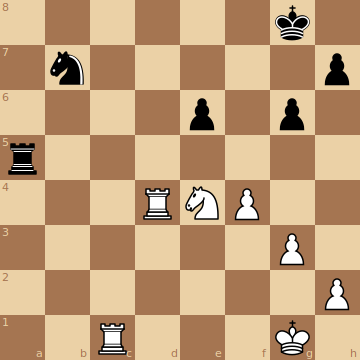

Idx 3607 Actual Outcome white Prediction white Raw Output [[0.09889648 0.12714145]] Loss 0.68
FEN 3r4/1p2r1kp/p3Npp1/2q5/P1p1p1P1/2P1Q3/1P3PP1/R3R1K1 b - - 5 30


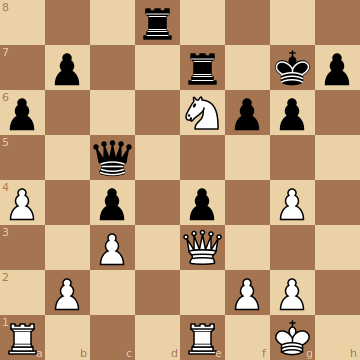

Idx 2727 Actual Outcome white Prediction black Raw Output [[ 0.30107105 -0.10445111]] Loss 0.92
FEN rnbqkbnr/ppp1pppp/3p4/8/4P3/5N2/PPPP1PPP/RNBQKB1R b KQkq - 1 2


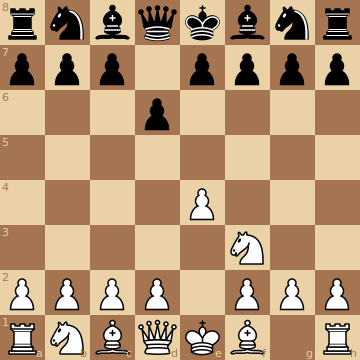

Idx 3316 Actual Outcome black Prediction black Raw Output [[ 1.3571923 -1.0460517]] Loss 0.09
FEN r3q1k1/p1p1nrb1/1p4pp/3p4/2BPb3/1QP1B3/PP2N1PP/5RK1 w - - 0 18


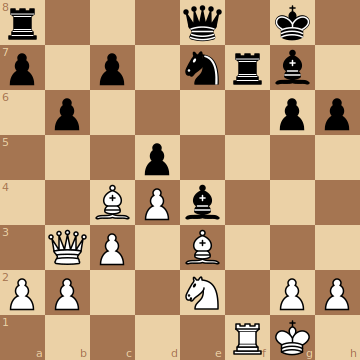

Idx 443 Actual Outcome black Prediction black Raw Output [[ 1.6397376 -1.3523394]] Loss 0.05
FEN 4r1k1/2Q2p1p/Np4p1/p7/8/6PK/PPP2PqP/R3n3 w - - 5 26


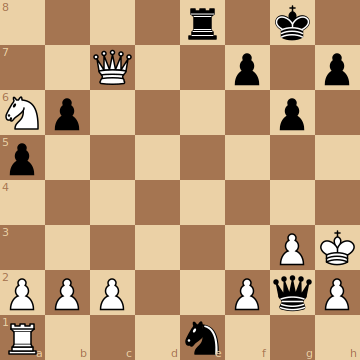

In [32]:
# Visualization
SVG_BASE_URL = "https://us-central1-spearsx.cloudfunctions.net/chesspic-fen-image/" 

def svg_url(fen):
    fen_board = fen.split()[0]
    return SVG_BASE_URL + fen_board

# Evaluation on test data
def evaluate_model(model, test_dataset):
    model.eval()
    with torch.no_grad():
        for i in range(num_visualizations):
            idx = randrange(len(test_dataset))
            batch = test_dataset[idx]
            x, y = torch.tensor(batch['binary']), batch['outcome']
            x = x.unsqueeze(0)  # Add batch dimension
            y_hat = model(x)  # Pass through the model
            y_hat = torch.argmax(y_hat, dim=1).item()
            y = y.item()
            loss = F.cross_entropy(model(x), torch.tensor([y])).item()
            outcome_map = {0: "black", 1: "white"}
            print(f'Idx {idx} Actual Outcome {outcome_map[y]} Prediction {outcome_map[y_hat]} Raw Output {model(x).detach().numpy()} Loss {loss:.2f}')
            print(f'FEN {batch["fen"]}')
            display(SVG(url=svg_url(batch["fen"])))

num_visualizations = 5  # Change this number to visualize more or fewer samples
evaluate_model(model, model.test_dataset)

#### Define load_model method for quick use of outcome_model

In [33]:
def load_model(model_path, layer_count=4, batch_size=512, learning_rate=1e-3):  # Adjust layer_count to match saved model
    model = OutcomeModel(layer_count=layer_count, batch_size=batch_size, learning_rate=learning_rate)
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    model.eval()
    return model

model_path = "chess_model.pth"
loaded_model = load_model(model_path)
print(loaded_model)


OutcomeModel(
  (seq): Sequential(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (linear-0): Linear(in_features=768, out_features=808, bias=True)
    (relu-0): ReLU()
    (linear-1): Linear(in_features=808, out_features=808, bias=True)
    (relu-1): ReLU()
    (linear-2): Linear(in_features=808, out_features=808, bias=True)
    (relu-2): ReLU()
    (linear-3): Linear(in_features=808, out_features=2, bias=True)
  )
)


#### Simulating an entire game with trained model and use starfish evaluation to inspect each step

In [35]:
import chess
import chess.engine
import torch

# Load the trained model
model_path = "chess_model.pth"  # Ensure this path matches the saved model path
loaded_model = load_model(model_path)

# Initialize a new chess board
board = chess.Board()

# Define a function to get the best move from the model
def get_best_move(board, model):
    best_move = None
    best_value = -float('inf')
    
    for move in board.legal_moves:
        board.push(move)
        binary_board = board_to_binary(board)
        x = binary_board.unsqueeze(0)  # Add batch dimension
        y_hat = model(x)  # Pass through the model
        value = torch.softmax(y_hat, dim=1).detach().numpy()[0][1]  # Probability of winning
        if value > best_value:
            best_value = value
            best_move = move
        board.pop()  # Undo the move
    
    return best_move

# Convert the board to binary format
def board_to_binary(board):
    binary = []
    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece:
            binary.extend(piece_to_binary(piece))
        else:
            binary.extend([0] * 12)  # 12 channels for empty squares
    return torch.tensor(binary, dtype=torch.float)

def piece_to_binary(piece):
    piece_map = {
        'P': 0, 'N': 1, 'B': 2, 'R': 3, 'Q': 4, 'K': 5,
        'p': 6, 'n': 7, 'b': 8, 'r': 9, 'q': 10, 'k': 11
    }
    binary = [0] * 12
    binary[piece_map[piece.symbol()]] = 1
    return binary

# Function to evaluate the board using Stockfish
def evaluate_with_stockfish(board, engine_path="/opt/homebrew/bin/stockfish"):
    with chess.engine.SimpleEngine.popen_uci(engine_path) as engine:
        result = engine.analyse(board, chess.engine.Limit(time=0.1))
        return result['score'].relative.score(mate_score=10000) / 100.0  # Convert to centipawns

# Play a move
def play_and_evaluate(board, model, engine_path):
    move = get_best_move(board, model)
    print(f"Model's move: {move}")
    board.push(move)
    print(board)

    # Evaluate the move using Stockfish
    stockfish_eval = evaluate_with_stockfish(board, engine_path)
    print(f"Stockfish evaluation after model's move: {stockfish_eval}")

# Integrate with a game loop
engine_path = "/opt/homebrew/bin/stockfish"  # Update this with the actual path to Stockfish
while not board.is_game_over():
    if board.turn == chess.WHITE:
        play_and_evaluate(board, loaded_model, engine_path)
    else:
        # Here you could integrate human input or another model's move
        play_and_evaluate(board, loaded_model, engine_path)  # For simplicity, using the same model for both sides


Model's move: b1c3
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . N . . . . .
P P P P P P P P
R . B Q K B N R
Stockfish evaluation after model's move: 0.0
Model's move: f7f6
r n b q k b n r
p p p p p . p p
. . . . . p . .
. . . . . . . .
. . . . . . . .
. . N . . . . .
P P P P P P P P
R . B Q K B N R
Stockfish evaluation after model's move: 1.34
Model's move: c3d5
r n b q k b n r
p p p p p . p p
. . . . . p . .
. . . N . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R . B Q K B N R
Stockfish evaluation after model's move: 0.18
Model's move: g8h6
r n b q k b . r
p p p p p . p p
. . . . . p . n
. . . N . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R . B Q K B N R
Stockfish evaluation after model's move: 0.62
Model's move: d5c7
r n b q k b . r
p p N p p . p p
. . . . . p . n
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R . B Q K B N R
Stockfish evaluation after model's move: 3.08
Model's move: e8f7
r n b q . b . r
p

#### evaluate model against baseline models:

In [36]:
import chess
import torch
import torch.nn.functional as F
from random import randrange


# Value assigned to each piece
MATERIAL_LOOKUP = {chess.KING:0,chess.QUEEN:9,chess.ROOK:5,chess.BISHOP:3,chess.KNIGHT:3,chess.PAWN:1}

outcome_model_path = "chess_model.pth"
outcome_model = load_model(outcome_model_path)

# Evaluate the OutcomeModel
zero_losses = []
mat_losses = []
model_losses = []

def avg(lst):
    return sum(lst) / len(lst)

def material_for_board(board):
    eval = 0.0
    for sq, piece in board.piece_map().items():
        mat = MATERIAL_LOOKUP[piece.piece_type]
        if piece.color == chess.BLACK:
            mat = mat * -1
        eval += mat
    return eval

def guess_zero_loss(idx, dataset):
    batch = dataset[idx]
    y = batch['outcome'].clone().detach().long()
    y_hat = torch.zeros(2)  # Assuming equal probability for win/lose
    y_hat[0] = 0.5
    y_hat[1] = 0.5
    loss = F.cross_entropy(y_hat.unsqueeze(0), y.unsqueeze(0))
    return loss.item()

def guess_material_loss(idx, dataset):
    batch = dataset[idx]
    board = chess.Board(batch['fen'])
    y = batch['outcome'].clone().detach().long()
    material_eval = material_for_board(board)
    y_hat = torch.zeros(2)
    if material_eval > 0:
        y_hat[1] = 1.0  # White wins
    else:
        y_hat[0] = 1.0  # Black wins
    loss = F.cross_entropy(y_hat.unsqueeze(0), y.unsqueeze(0))
    return loss.item()

def guess_model_loss(idx, dataset, model):
    batch = dataset[idx]
    x = batch['binary'].clone().detach()
    y = batch['outcome'].clone().detach().long()
    y_hat = model(x.unsqueeze(0))
    loss = F.cross_entropy(y_hat, y.unsqueeze(0))
    return loss.item()

for i in range(100):
    idx = randrange(len(dataset))
    zero_losses.append(guess_zero_loss(idx, dataset))
    mat_losses.append(guess_material_loss(idx, dataset))
    model_losses.append(guess_model_loss(idx, dataset, outcome_model))

print(f'Guess Zero Avg Loss {avg(zero_losses)}')
print(f'Guess Material Avg Loss {avg(mat_losses)}')
print(f'Guess Model Avg Loss {avg(model_losses)}')


Guess Zero Avg Loss 0.6931471824645996
Guess Material Avg Loss 0.5032616522908211
Guess Model Avg Loss 0.13428312915380958


# Discussion

## Interpreting the result

The results of our Chess AI project reveal several key insights into the performance of our model compared to baseline methods. The average loss for the model trained on game outcomes was significantly lower than that of the zero-knowledge and material evaluation baselines. Specifically, the model achieved an average loss of 0.1343, compared to 0.6931 for the zero-knowledge baseline and 0.5033 for the material evaluation baseline. This indicates that our model is more effective at predicting game outcomes based on the binary board representation than simple heuristics or equal probability guesses.The model achieved a Mean Absolute Error (MAE) of approximately 1.85, significantly lower than the baseline models (7.69 for zero prediction and 5.40 for material-based evaluation). This demonstrates the model's capability to closely mimic the evaluations provided by Stockfish, suggesting that it successfully learned to assess positions with reasonable accuracy.

Furthermore, the visualization of board positions and corresponding predictions showed that our model could reasonably approximate the evaluations given by high-quality engines like Stockfish. Among the tested configurations, the model with 8 linear layers, a batch size of 256, and a learning rate of 1e-3 performed the best.This suggests that our supervised learning approach, which leverages pre-evaluated positions, provides a practical and efficient alternative to reinforcement learning for developing competitive chess AI.

## Limitations

While our project demonstrates promising results, several limitations should be considered. First, our model's performance is inherently constrained by the quality and diversity of the training data. The dataset used, although substantial, may not encompass all possible chess positions, potentially limiting the model's generalizability to novel or rare scenarios.

Second, our reliance on pre-evaluated positions means that our model's predictions are ultimately bounded by the accuracy of the Stockfish evaluations used as labels. Any inherent biases or inaccuracies in these evaluations could propagate through to our model.

Additionally, while the dataset used is substantial, comprising over 5.5 million evaluated positions, the diversity and quality of data could be improved. More diverse game data, including positions from different levels of play, might enhance the model's robustness and generalizability.

Moreover, the model's evaluation function, although effective, is simplistic compared to advanced methods like Monte Carlo Tree Search (MCTS) used in AlphaZero. Integrating more sophisticated evaluation techniques could further improve performance but would also increase complexity and computational requirements.

Lastly, ethical considerations around the deployment of AI in competitive environments must be addressed. There is a risk of AI assistance in human-only competitions, which could undermine the integrity of the game. It is essential to engage with the chess community to monitor and address any unintended consequences of deploying our AI.

## Ethics & Privacy

### Privacy and Anonymity
While our primary data (chess positions and engine evaluations) does not involve personal information, we take user data privacy seriously. In cases where we collect gameplay data or feedback from users interacting with the AI, strict anonymization protocols will be followed to ensure compliance with data protection regulations such as GDPR and CCPA.

### Ethical Use of Intellectual Property
Our project leverages open-source tools and datasets provided by entities like Stockfish and Lichess. We commit to respecting the intellectual property rights associated with these resources. This includes adhering to license agreements, acknowledging contributions, and ensuring all software and data used are either open source or properly licensed.

### Transparency and Misrepresentation
We are committed to transparency about our AI's capabilities, the development process, and its limitations to prevent any potential misinterpretation or misuse. This includes clear communication about how the AI makes decisions and its performance across different chess scenarios.

### Unintended Consequences
Deploying AI in competitive environments such as chess tournaments may lead to unintended consequences, including ethical concerns about AI assistance in human-only competitions. We will actively engage with the chess community to monitor and address any issues that arise from the AI's deployment.

### Tool Assistance
To address ethical concerns systematically, we will utilize tools like the [Deon checklist](https://deon.drivendata.org), which assists in ensuring that ethical considerations are integrated throughout the project lifecycle. This approach helps in maintaining ethical integrity in data collection, model training, and the deployment phases of the Chess AI.

Our commitment extends beyond just avoiding misuse of AI; we aim to proactively engage with the community to ensure our Chess AI enhances the game without compromising ethical standards or privacy.


## Conclusion

In conclusion, our Chess AI project demonstrates the potential of supervised learning methods to develop competitive chess-playing models. By training on pre-evaluated positions, we were able to achieve a model that closely approximates expert evaluations, with significantly lower computational costs compared to reinforcement learning approaches. Our findings suggest that supervised learning can serve as a viable and accessible alternative for researchers and enthusiasts aiming to develop high-performing chess AI.

Future work should focus on expanding the diversity of training data, optimizing model architectures, and addressing the ethical implications of AI in chess. By continuing to refine these aspects, we can further advance the capabilities and applications of chess AI, contributing to both the academic field and the broader chess community.

# Footnotes
[1] Silver, D., Schrittwieser, J., Simonyan, K., Antonoglou, I., Huang, A., Guez, A., ... & Hassabis, D. (2017). Mastering the game of go without human knowledge. Nature, 550(7676), 354-359.

[2] Sadler, M., & Regan, N. (2019). Game Changer: AlphaZero's Groundbreaking Chess Strategies and the Promise of AI. New In Chess.

[3] Ruoss, A., Delétang, G., Medapati, S., etl. (2024). Grandmaster-Level Chess Without Search. ArXiv, 2402.04494.

[4] Golsangi, M. (2023, May 1). A different outlook toward chess and Artificial Intelligence. Medium. https://medium.com/@mitrajeetgolsangi/a-different-outlook-toward-chess-and-artificial-intelligence-66ddae87812c 